
# Logistic Regression from Scratch (Learning Exercise)

This notebook is a **guided coding exercise** to help you understand **Logistic Regression** by implementing it **from scratch using NumPy**.

 You will **fill in missing code (TODOs)**.  
 **Hints** are provided after each exercise.  
 Keep the math simple and focus on intuition.

---



## 1. Import required libraries

We will only use:
- `numpy` for computation
- `matplotlib` for visualization


In [28]:

# TODO: Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt



## 2. Create a toy dataset

We create a **simple binary classification dataset** with two features.

Class 0 → points near (1,1)  
Class 1 → points near (3,3)


In [29]:
# Run this block as is to generate toy data
# Generate toy data
np.random.seed(42)

# Class 0
X0 = np.random.randn(50, 2) + np.array([1, 1])
y0 = np.zeros(50)

# Class 1
X1 = np.random.randn(50, 2) + np.array([3, 3])
y1 = np.ones(50)

# Combine
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

print(X.shape, y.shape)


(100, 2) (100,)



### Visualize the data


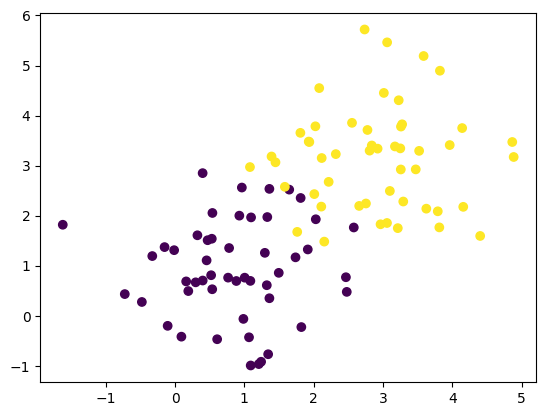

In [30]:
# TODO: Scatter plot the two classes
# Hint: Use plt.scatter

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()



## 3. Sigmoid Function

Logistic Regression uses the **sigmoid** function:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

This maps any real number to (0,1).


In [31]:
def sigmoid(z):
    # TODO: Implement sigmoid
    return 1/(1+np.exp(-z))
    pass


## 4. Model Prediction

The logistic regression model is:

\[
z = Xw + b
\]
\[
\hat{y} = \sigma(z)
\]

where:
- `w` → weight vector
- `b` → bias


In [32]:

def predict_proba(X, w, b):
    # TODO: Compute z and apply sigmoid
    # Hint : Use @ (search for it if you don't know)
    z=np.dot(X,w)+b
    predict_proba=sigmoid(z)
    return predict_proba
    pass


## 5. The Log Likelihood ( This is what we want to optimze)

\[
L = -\frac{1}{n} \sum [y \log(\hat y) + (1-y) \log(1-\hat y)]
\]


In [33]:

def compute_loss(y, y_hat):
    # TODO: Implement
    # Hint: use np.mean and np.log
    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss
    pass


## 6. Gradients

We compute gradients w.r.t. parameters:

\[
dw = \frac{1}{n} X^T(\hat y - y)
\]
\[
db = \frac{1}{n} \sum (\hat y - y)
\]


In [34]:

def compute_gradients(X, y, y_hat):
    # TODO: Compute dw and db
    # Hint:
    # Use the above formulas
    n = X.shape[0]
    dw = (1/n)*np.dot(X.T, (y_hat - y))
    db = (1/n)*np.sum(y_hat - y)
    return dw, db
    pass



## 7. Training Loop (Gradient Descent)

We now train the model using gradient descent.


In [35]:
# Initialize parameters
w = np.zeros(X.shape[1])
b = 0.0

learning_rate = 0.1
epochs = 1000

losses = []

for epoch in range(epochs):
    # TODO: Forward pass
    y_hat = predict_proba(X, w, b)

    # TODO: Compute loss
    loss = compute_loss(y, y_hat)
    # print(loss)

    # TODO: Compute gradients
    dw, db = compute_gradients(X, y, y_hat)
    # print(dw, db)


    # TODO: Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 100 == 0:
        losses.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.3723
Epoch 200, Loss: 0.2892
Epoch 300, Loss: 0.2476
Epoch 400, Loss: 0.2225
Epoch 500, Loss: 0.2056
Epoch 600, Loss: 0.1933
Epoch 700, Loss: 0.1840
Epoch 800, Loss: 0.1766
Epoch 900, Loss: 0.1706



## 8. Plot Training Loss


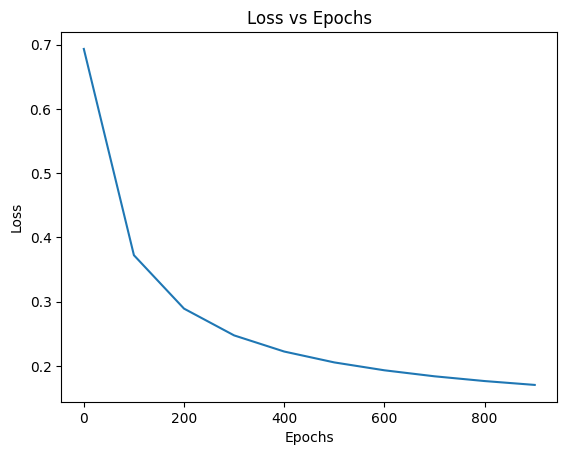

In [36]:

# TODO: Plot loss vs epochs
# Hint: plt.plot(losses)
plt.plot(range(0, epochs, 100), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()



## 9. Make Predictions

Convert probabilities to class labels.


In [37]:

def predict(X, w, b, threshold=0.5):
    # TODO: Return 0/1 predictions
    # Hint: predict_proba(...) >= threshold
    y_hat = predict_proba(X, w, b)
    return (y_hat >= threshold).astype(int)



## 10. Evaluate Accuracy


In [38]:

# TODO: Compute accuracy
# Hint: np.mean(y_pred == y)
y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")



Training Accuracy: 93.00%



## 11. Decision Boundary Visualization

This is optional but highly recommended.


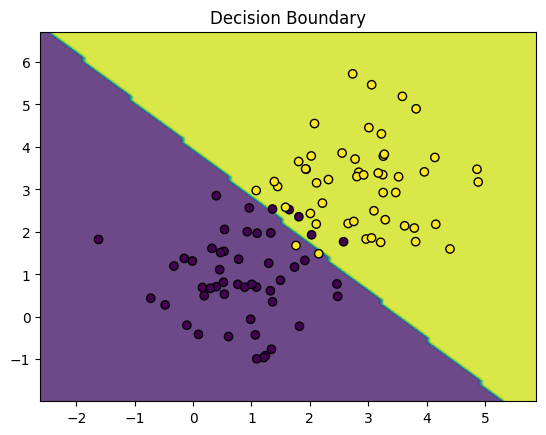

In [39]:

# OPTIONAL:
# Create a meshgrid and plot decision boundary
pltdelta = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, pltdelta),
                         np.arange(y_min, y_max, pltdelta))
Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title('Decision Boundary')
plt.show()
